# Module 1 - Introducing Libraries: NumPy and Pandas
## Pandas Part 1

### Introduction

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. You have found out that Austin has one of the largest no-kill animal shelters in the country, and they keep meticulous track of animals that have been taken in and released. However, it is a large file, the online visualization tools provided are terrible, the data is sorted as strings, and the file holds an overwhelming amount  of information. Is there an easy way to look at this data? Can we do this with base Python? Is there a better way?


#### _Our goals today are to be able to_: <br/>

- Identify and import Python libraries
- Identify differences between NumPy and base Python in usage and operation
- Import/read data using Pandas
- Identify Pandas objects and manipulate Pandas objects by index and columns
- Filter data using Pandas

#### _Big questions for this lesson_: <br/>
- What is a package, what do packages do, and why might we want to use them?
- When do we want to use NumPy versus Pandas?
- What are the advantages of using Pandas?

### Activation:

![excel](excelpic.jpg)

Most people have used Microsoft Excel or Google sheets. But what are the limitations of excel?

- [Take a minute to read this article](https://www.bbc.com/news/magazine-22223190)
- make a list of problems excel presents

How is using python different?

### 1. Importing Python Libraries


In an earlier lesson, we wrote a function to calculate the mean of an list. That was **tedious**.

Thankfully, other people have wrote and optimized functions and wrapped them into `libraries` we can then call and use in our analysis.

![numpy](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/master/images/numpy.png)

[NumPy](https://www.numpy.org/) is the fundamental package for scientific computing with Python. 


To import a package type `import` followed by the name of the library as shown below.

In [153]:
import numpy 

x=numpy.array([1,2,3])
print(x)

#most packages have a standard way to import them
import numpy as np

y=np.array([4,5,6])
print(y)


[1 2 3]
[4 5 6]


Because of numpy we can now get the **mean** and other quick math of lists and arrays.

In [154]:
example = [4,3,25,40,62,20]
print(np.mean(example))

25.666666666666668


Now let's import some other packages. We will cover in more detail some fun options for numpy later.

In [155]:
import scipy
import pandas as pd
import matplotlib as mpl
# this inlines the graphs!
%matplotlib inline

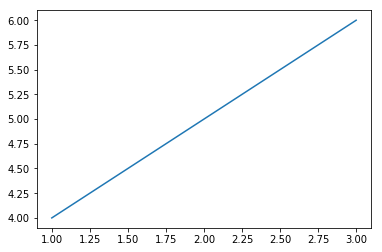

In [156]:
#sometimes we will want to import a specific module from a library
import matplotlib.pyplot as plt

plt.plot(x,y)

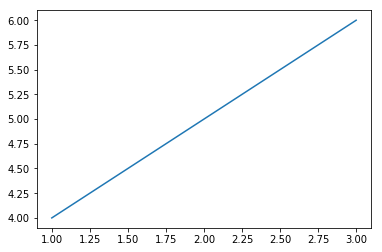

In [157]:
#OR we can also import it this way

from matplotlib import pyplot as plt 
plt.plot(x,y)

Try importing the seaborn library as ['sns'](https://en.wikipedia.org/wiki/Sam_Seaborn) which is the convention.

In [158]:
import seaborn as sns

What happens if we mess with naming conventions? For example, import one of our previous libraries as print.


PLEASE NOTE THAT WE WILL HAVE TO RESET THE KERNEL AFTER RUNNING THIS. Comment out your code after running it.


In [160]:
#Did we get an error? What about when we run the following command?
# import seaborn as print
print(x)

#Restart your kernel and clear cells

[1 2 3]


In [161]:
help("modules")


Please wait a moment while I gather a list of all available modules...

IPython             audioop             jedi                runpy
__future__          autoreload          jinja2              s3transfer
_abc                awscli              jmespath            sched
_ast                babel               json                scipy
_asyncio            backcall            jsonschema          seaborn
_bisect             base64              jupyter             secrets
_blake2             bdb                 jupyter_client      select
_bootlocale         binascii            jupyter_console     selectors
_bz2                binhex              jupyter_core        send2trash
_codecs             bisect              keyword             setuptools
_codecs_cn          bleach              kiwisolver          shelve
_codecs_hk          botocore            leather             shlex
_codecs_iso2022     builtins            lib2to3             shutil
_codecs_jp          bz2                 lib

In [162]:
import bdb

#### Helpful links: library documenation

Libraries have associated documentation to explain how to use the different tools included in a library.

- [NumPy](https://docs.scipy.org/doc/numpy/)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/)
- [Pandas](http://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)

### 2. NumPy versus base Python

Now that we know libraries exist, why do we want to use them? Let us examine a comparison between base Python and Numpy.

Python has lists and normal python can do basic math. NumPy, however, has the helpful objects called arrays.

Numpy has a few advantages over base Python which we will look at.

In [163]:
names_list=['Bob','John','Sally']
names_array=numpy.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(type(names_list))
print(type(names_array))

<class 'list'>
<class 'numpy.chararray'>


In [167]:
# Make a list and an array of three numbers

#your code here
numbers_list = [246, 52, 47]
numbers_array = numpy.array([246, 52, 47])

In [168]:
# divide your array by 2

numbers_array/2

array([123. ,  26. ,  23.5])

In [169]:
# divide your list by 2

numbers_list/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

Numpy arrays support the \_div\_ operator while python lists do not. There are other things that make it useful to utilize numpy over base python for evaluating data.

Below, you will find a piece of code we will use to compare the speed of operations on a list and operations on an array. In this speed test, we will use the library [time](https://docs.python.org/3/library/time.html).

In [170]:
import time
time.time()
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [171]:
import time
import numpy as np


size_of_vec = 10

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 6.9141387939453125e-06 numpy: 0.00014281272888183594
Numpy is in this example 0.048414023372287146 times faster!


In pairs, run the speed test with a different number, and share your results with the class.

### 3. Importing and reading data with ACTUAL LITERAL Pandas!


![pandas-lib](https://pandas.pydata.org/_static/pandas_logo.png)

![alt text](https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg "https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg")

#### Let's use pandas to read some csv files so we can interact with them.

First, let's check which directory we are in so the files we expect to see are there.

In [172]:
!pwd
!ls -al

/Users/enkeboll/code/fis/dc_ds_04_22_19/module_1/lecture_2_day_3_numpy_n_pandas
total 432
drwxr-xr-x  8 enkeboll  staff     256 Apr 24 16:53 .
drwxr-xr-x  7 enkeboll  staff     224 Apr 24 14:10 ..
drwxr-xr-x  3 enkeboll  staff      96 Apr 24 14:43 .ipynb_checkpoints
-rw-r--r--  1 enkeboll  staff   28729 Apr 24 14:39 copy.ipynb
-rw-r--r--  1 enkeboll  staff      62 Apr 24 14:10 example1.csv
-rw-r--r--  1 enkeboll  staff   63117 Apr 24 14:10 excelpic.jpg
-rw-r--r--  1 enkeboll  staff  112403 Apr 24 16:53 intro_to_libraries_numpy_and_pandas.ipynb
-rw-r--r--  1 enkeboll  staff     238 Apr 24 14:10 made_up_jobs.csv


Did you see that? It is possible to run terminal commands from jupyter notebook by using `!`

In [173]:
import pandas as pd
example_csv=pd.read_csv('example1.csv')

There are also `read_excel` and many other pandas `read` functions.

In [174]:
example_csv #this is an example template of how to read a csv

,Title1,Title2,Title3
0,one,two,three
1,example1,example2,example3


Try loading in the example file in the directory called 'made_up_jobs.csv' using pandas.

In [175]:
#read in your csv here!
jobs = pd.read_csv('made_up_jobs.csv')


#remember that it's nice to be able to look at your data, so let's do that here, too.
jobs.describe()


,ID,Years Employed
count,6.000000,6.000000
mean,2.500000,22.500000
std,1.870829,23.602966
min,0.000000,2.000000
25%,1.250000,6.250000
50%,2.500000,11.500000
75%,3.750000,40.750000
max,5.000000,55.000000


You can also load in data by using the url of an associated dataset.

In [240]:
shelter_data=pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD') 
#this link is copied directly from the download option for CSV

shelter_data.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A793392,NaN,04/24/2019 09:37:00 PM,04/24/2019 09:37:00 PM,04/22/2019,Transfer,Partner,Cat,Intact Male,2 days,Domestic Shorthair Mix,White/Black
1,A793087,*Jeepers,04/24/2019 07:04:00 PM,04/24/2019 07:04:00 PM,04/19/2017,Adoption,NaN,Dog,Neutered Male,2 years,Harrier Mix,Black/Tricolor
2,A793417,Diamond,04/24/2019 07:04:00 PM,04/24/2019 07:04:00 PM,04/24/2018,Return to Owner,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,Chocolate/White
3,A793416,NaN,04/24/2019 07:00:00 PM,04/24/2019 07:00:00 PM,02/24/2019,Euthanasia,Rabies Risk,Other,Unknown,NaN,Raccoon Mix,Black/White
4,A772415,Sky,04/24/2019 06:48:00 PM,04/24/2019 06:48:00 PM,04/12/2018,Adoption,Foster,Dog,Spayed Female,1 year,Border Collie Mix,Sable


Now that we can read in data, let's get more comfortable with our Pandas data structures.

In [177]:
type(shelter_data)

pandas.core.frame.DataFrame

In [178]:
ID_series=shelter_data['Animal ID'] #you can specify particular columns in a data frame in this way.

type(ID_series)

pandas.core.series.Series

### 4. Utilizing and identifying Pandas objects

- What is a DataFrame object and what is a Series object? 
- How are they different from Python lists and dictionary objects?

These are questions we will cover in this section. To start, let's start with this list of fruits.

In [179]:
#define your list here!

fruits = ['Apple','Orange','Watermelon','Lemon','Mango']

print(fruits)

['Apple', 'Orange', 'Watermelon', 'Lemon', 'Mango']


Using our list of fruits, we can create a pandas object called a 'series' which is much like an array or a vector.

In [180]:
fruits_series = pd.Series(fruits)

print(fruits_series)
print(type(fruits))
print(type(fruits_series))

0         Apple
1        Orange
2    Watermelon
3         Lemon
4         Mango
dtype: object
<class 'list'>
<class 'pandas.core.series.Series'>


One difference between python **list objects** and pandas **series objects** is the fact that you can define the index _manually._

In [181]:
ind = range(len(fruits))

fruits_series = pd.Series(fruits,index=ind)

print(fruits_series)


0         Apple
1        Orange
2    Watermelon
3         Lemon
4         Mango
dtype: object


With a partner, create your own custom series from a list of lists.

In [182]:
list_of_lists=[['cat'],['dog'],['horse'],['cow'],['macaw']]

#create custom indices for your series
indices = ['a', 'b', 'c', 'd', 'e']
indices = [x**2 for x in range(len(list_of_lists))]

#create the series using your list objects
#HINT: use a for loop
animals = [x[0] for x in list_of_lists]

print(animals)

animal_series = pd.Series(animals, index=indices)


#print your series
print(animal_series)

['cat', 'dog', 'horse', 'cow', 'macaw']
0       cat
1       dog
4     horse
9       cow
16    macaw
dtype: object


We can do a simliar thing with Python dictionaries. This time, however, we will create a DataFrame object from a python dictionary.

In [183]:
# Dictionary with list object in values
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante'],
    'age' : ['35','17','26'],
    'city' : ['Houston', 'Seattle', 'New york']
}

students_df = pd.DataFrame(student_dict)

students_df.head()

,name,age,city
0,Samantha,35,Houston
1,Alex,17,Seattle
2,Dante,26,New york


In [184]:
#to find data types of columns
students_df.dtypes

name    object
age     object
city    object
dtype: object

Let's change the data type of ages to int.

In [185]:
students_df.age.astype(int)

0    35
1    17
2    26
Name: age, dtype: int64

In [186]:
students_df.age = students_df.age.astype(int)

students_df.dtypes

name    object
age      int64
city    object
dtype: object

We can also use a custom index for these items. For example, we might want them to be the individual student ID numbers.

In [187]:
school_ids = ['1111','1145','0096']

students_df = pd.DataFrame(student_dict,index=school_ids)

students_df

,name,age,city
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New york


Using Pandas, we can also rename column names.

In [188]:
students_df.columns = ['NAME', 'AGE','HOME']
students_df.head()

,NAME,AGE,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New york


Or, we can also change the column names using the rename function.

In [189]:
students_df.rename(columns={'AGE': 'YEARS'}, inplace=True)
students_df.head()

,NAME,YEARS,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New york


Similarly, there is a tool to remove rows and columns from your DataFrame

In [190]:
dropped_df = students_df.drop(columns=['YEARS', 'HOME'])
print(students_df)


          NAME YEARS      HOME
1111  Samantha    35   Houston
1145      Alex    17   Seattle
0096     Dante    26  New york


If you want the file to save over itself, use the option `inplace = True`.

Every function has options. Let's read more about `drop` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [191]:
students_df.drop(index=['1111']) #unintuitively, this is a string!

,NAME,YEARS,HOME
1145,Alex,17,Seattle
0096,Dante,26,New york


Adding columns can be a bit trickier, however.

#### Getting Started

Let's define a function that returns a dataframe for us to work with. Note that this dataframe is created from a `list` of dictionaries, and each `dict` has identical _keys_ representing field names. The _values_ are the data to be stored in each field.

This list-of-dictionaries format is a common way to represent _rows of data_ in Python.

Pandas is not the only tool that supports it natively: **MongoDB** also represents each row of a dataset as a dictionary. This format is also useful when working with big data in Spark.

In [192]:
def get_customer_data():
    """Return a Pandas DataFrame containing imaginary customer data."""
    customers = [
        {'name': 'Harmony', 'state': 'OR'},
        {'name': 'Sarah', 'state': 'CA'},
        {'name': 'Sharad', 'state': 'WA'},
        {'name': 'CJ', 'state': 'NY'},
        {'name': 'Jerry', 'state': 'OR'},
    ]
    return pd.DataFrame(customers)

In [193]:
get_customer_data()

,name,state
0,Harmony,OR
1,Sarah,CA
2,Sharad,WA
3,CJ,NY
4,Jerry,OR


#### Get the customer data

In [194]:
customer_df = get_customer_data()

#### Try to identify all Oregonian customers as hippies:


In [195]:
customer_df[customer_df['state'] == 'OR']

,name,state
0,Harmony,OR
4,Jerry,OR


In [196]:
oregon_customer_df = customer_df[customer_df['state'] == 'OR']
oregon_customer_df['is_hippy'] = 1
oregon_customer_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,state,is_hippy
0,Harmony,OR,1
4,Jerry,OR,1


#### Try to identify all non-Oregonian customers as non-hippies:


In [197]:
non_oregon_customer_df = customer_df[customer_df['state'] != 'OR']
non_oregon_customer_df['is_hippy'] = 0
non_oregon_customer_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,state,is_hippy
1,Sarah,CA,0
2,Sharad,WA,0
3,CJ,NY,0


#### We can do the same thing on a single line (and get the same warning):

In [198]:
customer_df[customer_df['state'] == 'OR']['is_hippy'] = 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### See the results! (What's wrong?)

In [199]:
customer_df

,name,state
0,Harmony,OR
1,Sarah,CA
2,Sharad,WA
3,CJ,NY
4,Jerry,OR


#### What went wrong?

1. First, we _sliced_ the original dataframe to include just Oregon customers.
2. The _slice_ `oregon_customer_df` could be interpreted as a _new dataframe_ containing the selected rows in the original `customer_df`, or as a _pointer to_ the rows in the original dataframe. Pandas doesn't know which one we want.
3. When we try to _modify_ or _set_ values in the slice, Pandas doesn't know what to do.

#### One way to avoid the error is to explicitly make a copy of the slice with `df.copy()`:

In [200]:
oregon_customer_df = customer_df[customer_df['state'] == 'OR'].copy()
oregon_customer_df['is_hippy'] = 1
oregon_customer_df

,name,state,is_hippy
0,Harmony,OR,1
4,Jerry,OR,1


#### What if we really want to modify the original dataframe?
#### We can use `df.loc[columns, rows]` to explicity modify the original dataframe.

In [201]:
customer_df.loc[customer_df['state'] == 'OR', 'is_hippy'] = int(1)
customer_df.loc[customer_df['state'] != 'OR', 'is_hippy'] = int(0)

#### See the awesome results!


In [202]:
customer_df

,name,state,is_hippy
0,Harmony,OR,1.0
1,Sarah,CA,0.0
2,Sharad,WA,0.0
3,CJ,NY,0.0
4,Jerry,OR,1.0


### 5. Filtering data using Pandas

There are several ways to grab particular data from a DataFrame.

We saw the use of loc in the previous example. iloc and loc can be used in a few different ways to access data from a DataFrame. 

In [203]:
customer_df.iloc[2,:] #returns the first row

name        Sharad
state           WA
is_hippy         0
Name: 2, dtype: object

In [204]:
customer_df.iloc[:,:] #returns the first column

,name,state,is_hippy
0,Harmony,OR,1.0
1,Sarah,CA,0.0
2,Sharad,WA,0.0
3,CJ,NY,0.0
4,Jerry,OR,1.0


In [205]:
customer_df.iloc[0:2,:] #returns first two rows

,name,state,is_hippy
0,Harmony,OR,1.0
1,Sarah,CA,0.0


In [206]:
customer_df.iloc[:,2:3] #returns the first two columns

,is_hippy
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


How would we use indexing to return the last item in the last row?

In [207]:
#return the last item in the last row using indexing

customer_df.iloc[-1,-1]

1.0

Use loc to return rows and columns based on labels. Let's look at the students_df DataFrame again.

In [208]:
students_df.head()

,NAME,YEARS,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New york


In [209]:
students_df.loc['1111'] #returns the student information associated with the ID number 1111, which is the index

NAME     Samantha
YEARS          35
HOME      Houston
Name: 1111, dtype: object

In [211]:
students_df.loc[:,'YEARS'] #returns the column labeled 'YEARS'

1111    35
1145    17
0096    26
Name: YEARS, dtype: object

In [212]:
students_df.loc['1111','NAME':'HOME'] #returns information for the row labeled '1111' for columns from 'NAME' to 'HOME'

NAME     Samantha
YEARS          35
HOME      Houston
Name: 1111, dtype: object

How could we return the first and last rows if loc accepts a list of labels?

In [213]:
#return the first and last rows using one loc command

students_df.loc[['1111','0096'],:]

,NAME,YEARS,HOME
1111,Samantha,35,Houston
0096,Dante,26,New york


We can use loc to complete more complicated filtering of our data using boolean indexing.

In [214]:
students_df.loc[students_df['NAME']=='Samantha'] #returns only rows where the name of the student is Samantha

,NAME,YEARS,HOME
1111,Samantha,35,Houston


We can also find out which customers in the customer_df DataFrame are not from Oregon. However, I only want to know their names. How would I return this?

In [215]:
customer_df.head()

,name,state,is_hippy
0,Harmony,OR,1.0
1,Sarah,CA,0.0
2,Sharad,WA,0.0
3,CJ,NY,0.0
4,Jerry,OR,1.0


In [220]:
#return the names of customers who are not from Oregon
customer_df.loc[customer_df['state'] != 'OR', 'name']


1     Sarah
2    Sharad
3        CJ
Name: name, dtype: object

Let's select only a single column from a DataFrame. This will create a series, which allows for straightforwards, simple selection of the data it holds. 

In [221]:
states=customer_df.loc[:,'state'] #returns a series!!
type(states)

pandas.core.series.Series

In [222]:
states[0:3] #returns the first 3 items

0    OR
1    CA
2    WA
Name: state, dtype: object

In [223]:
states[states=='OR'] #returns 'OR' data and index

0    OR
4    OR
Name: state, dtype: object

Now that we know how to select specific data, we can manipulate those cells. For example, we need to update our customer data because all of our customers in Oregon have moved to New Jersey.

In [224]:
customer_df.loc[customer_df["state"]=='OR', "state"] = 'NJ'

customer_df

,name,state,is_hippy
0,Harmony,NJ,1.0
1,Sarah,CA,0.0
2,Sharad,WA,0.0
3,CJ,NY,0.0
4,Jerry,NJ,1.0


Or maybe we got a customer's name wrong and need to change that. Perhaps CJ is actually named TJ. How would we do that?

In [227]:
#return a the customer_df with the fixed name
customer_df.loc[customer_df["name"]=='CJ', "name"] = 'TJ'
customer_df

,name,state,is_hippy
0,Harmony,NJ,1.0
1,Sarah,CA,0.0
2,Sharad,WA,0.0
3,TJ,NY,0.0
4,Jerry,NJ,1.0


### Lesson Recap

Now that we have all of these new tools in our tool belt, let's take another look at our animal shelter data! 

- Use `shelter_data.columns` to get the list of column names
- Drop columns from the animal shelter data until you have only 5 columns remaining
- Rename those columns
- Get the `unique()` values in outcomes 
- select rows of animals based on an application of boolean indexing

For extra credit: add in your own new column on information to this DataFrame.

In [229]:
shelter_data.columns
shelter_data.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A793392,NaN,04/24/2019 09:37:00 PM,04/24/2019 09:37:00 PM,04/22/2019,Transfer,Partner,Cat,Intact Male,2 days,Domestic Shorthair Mix,White/Black
1,A793087,*Jeepers,04/24/2019 07:04:00 PM,04/24/2019 07:04:00 PM,04/19/2017,Adoption,NaN,Dog,Neutered Male,2 years,Harrier Mix,Black/Tricolor
2,A793417,Diamond,04/24/2019 07:04:00 PM,04/24/2019 07:04:00 PM,04/24/2018,Return to Owner,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,Chocolate/White
3,A793416,NaN,04/24/2019 07:00:00 PM,04/24/2019 07:00:00 PM,02/24/2019,Euthanasia,Rabies Risk,Other,Unknown,NaN,Raccoon Mix,Black/White
4,A772415,Sky,04/24/2019 06:48:00 PM,04/24/2019 06:48:00 PM,04/12/2018,Adoption,Foster,Dog,Spayed Female,1 year,Border Collie Mix,Sable


In [249]:
shelter_df = shelter_data.drop(columns=['Animal ID', 'DateTime', 'MonthYear', 'Date of Birth', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome'])

In [250]:
shelter_df.columns = ['name', 'outcome_type', 'animal_type', 'breed', 'color']
# shelter_df.unique()

In [251]:
shelter_df.outcome_type.unique()

array(['Transfer', 'Adoption', 'Return to Owner', 'Euthanasia', 'Died',
       nan, 'Rto-Adopt', 'Disposal', 'Missing', 'Relocate'], dtype=object)

In [257]:
shelter_df[(shelter_df.outcome_type == 'Adoption') & (shelter_df.animal_type == 'Cat')].head()

,name,outcome_type,animal_type,breed,color
13,Arlo,Adoption,Cat,Domestic Shorthair Mix,Black/White
16,NaN,Adoption,Cat,Siamese Mix,Lynx Point/White
18,NaN,Adoption,Cat,Siamese Mix,Lynx Point/White
19,NaN,Adoption,Cat,Siamese Mix,Lynx Point/White
54,Luna,Adoption,Cat,Ragdoll Mix,Lynx Point


In [281]:
shelter_df['andy_favorite'] = 0
shelter_df.loc[(shelter_df.animal_type == 'Cat') & (shelter_df.color == 'Calico'), 'andy_favorite'] = 1

shelter_df.sample(10)

,name,outcome_type,animal_type,breed,color,andy_favorite
34717,NaN,Adoption,Dog,Chihuahua Shorthair Mix,Brown,0
92891,Chloe,Adoption,Cat,Domestic Shorthair Mix,Calico,1
96161,*Pepper,Adoption,Dog,Miniature Poodle Mix,Black,0
97506,Katrina,Transfer,Dog,Rottweiler Mix,Black/Tan,0
8825,Beau,Adoption,Dog,Chihuahua Shorthair/Cardigan Welsh Corgi,Tricolor/Black,0
43522,NaN,Transfer,Cat,Domestic Shorthair Mix,Brown Tabby,0
66762,NaN,Adoption,Cat,Domestic Shorthair Mix,Orange Tabby,0
61595,*Jackson,Transfer,Cat,Domestic Shorthair Mix,Black/White,0
15041,NaN,Adoption,Dog,Labrador Retriever Mix,Chocolate/White,0
54011,Beauty,Return to Owner,Dog,Pit Bull Mix,White/Blue,0


## Assessment & Reflection